In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
pd.set_option('display.max_columns', 999)
plt.style.use('ggplot')

In [3]:
df_dummy = pd.read_csv('forex_dummy.csv')
df_pca1 = pd.read_csv('forex_pca_1.csv')
df_pca2 = pd.read_csv('forex_pca_2.csv')

In [4]:
df_pca1.dropna(inplace=True)
df_pca2.dropna(inplace=True)

In [5]:
df_dummy.head(3)

,ind_132,ind_124,ind_116,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_58,ind_61,ind_82,ind_67,ind_128,ind_70,ind_130,ind_392,ind_9,ind_418,ind_414,ind_410,ind_407,ind_406,ind_428,ind_77,ind_426,ind_424,ind_83,ind_92,ind_412,ind_399,ind_145,ind_387,ind_212,ind_102,ind_109,ind_194,ind_188,ind_118,ind_156,ind_153,ind_150,ind_134,ind_136,ind_139,ind_142,ind_147,ind_74,ind_5,ind_65,ind_21,ind_22,ind_23,ind_71,ind_13,ind_12,ind_10,ind_28,ind_29,ind_20,ind_31,ind_32,ind_33,ind_30,ind_34,ind_62,ind_56,ind_53,ind_8,ind_41,ind_19,ind_37,ind_6,ind_36,ind_35,ind_39,ind_340,ind_338,ind_344,ind_347,ind_349,ind_334,ind_351,ind_352,ind_345,ind_14,ind_18,ind_403,ind_404,ind_17,ind_16,ind_15,ind_332,ind_416,ind_397,ind_330,ind_309,ind_324,ind_88,ind_42,ind_122,90_target,ind_27,ind_26,ind_25,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_327,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_225,buy,ind_40_1,ind_40_2,ind_40_3,ind_40_4,ind_40_5,ind_40_6,ind_217_0,ind_217_1,ind_217_2,ind_217_3,ind_217_4,ind_217_5
0,-125,-25,-13,-22,-22,-21,-23,-36,-40,-43,-71,-93,-18,-5,-4,-2,-3,-50,-3,-83,-32.587,85.714,-54,2.000,-27,-23,-44,0.702,8,0.499,1.000,8,20.198,0.002,-0.003,0.228,-3.731,72.470,41.915,1,96.269,96.269,0.003,58.889,67.107,70.988,6,6,60.078,60.975,81.390,8,19,9,13,1,56,8,60.809,72.364,14.286,66.667,93.692,15,150.506,154.487,158.010,146.593,142.421,10,19,24,100.000,30.753,2,184.819,17,196.593,142.023,31.940,-0.319,1.197,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,23.800,9.110,0.045,-0.045,12.060,11.730,17.620,20.968,-49.600,-26.387,-0.157,-0.000,-0.000,0.001,-5,-3,36.998,0.000,-0.003,0.003,-23.190,-12.213,8.133,-39.935,7.450,7.990,12.057,1.201,0.000,10.000,0.000,99.736,1.200,-1.525,97.980,1.179,-0.757,98.906,1.190,99.157,0.040,1.000,0,0,1,0,0,0,0,1,0,0,0,0
1,-130,-28,-16,-18,-24,-24,-25,-38,-43,-45,-73,-96,-15,-7,-5,-2,-4,-54,-3,-88,-38.116,78.571,-60,0.800,-31,-16,-48,0.691,8,0.537,1.000,8,17.871,0.003,-0.000,0.290,-1.370,79.199,44.895,1,98.630,98.630,0.003,59.182,67.956,72.527,5,6,67.247,64.078,84.135,8,24,9,11,1,63,8,64.367,74.276,21.429,66.667,76.694,11,156.903,161.604,169.721,140.227,152.634,10,20,20,100.000,36.812,0,191.986,19,201.739,149.635,38.479,-0.319,1.197,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,11.450,9.223,0.035,-0.035,11.327,12.220,18.160,20.800,-55.600,-26.086,-0.157,-0.000,-0.000,0.000,-6,-3,37.016,-0.000,-0.003,0.003,-18.316,-2.463,20.369,-32.824,14.460,16.650,11.972,1.201,0.000,9.091,0.000,99.669,1.200,-1.524,97.932,1.179,-0.757,98.860,1.190,99.112,0.040,1.000,0,0,1,0,0,0,0,1,0,0,0,0
2,-132,-28,-15,-11,-21,-22,-24,-36,-42,-44,-72,-95,-13,-9,-6,-2,-4,-54,-4,-89,-40.428,71.429,-60,2.700,-30,-10,-48,0.693,8,0.615,1.000,8,12.437,0.004,-0.000,0.188,-4.279,82.241,45.088,1,95.721,95.721,0.003,59.319,68.345,73.224,5,3,72.441,66.410,85.392,8,30,10,9,-1,65,8,65.916,75.140,28.571,66.667,83.910,15,154.452,164.016,175.948,117.756,160.181,11,19,17,100.000,39.648,5,197.994,24,205.238,155.528,28.917,-0.319,1.197,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,8.750,9.312,0.006,-0.006,10.973,12.280,17.860,20.635,-58.400,-23.250,-0.157,-0.000,-0.000,0.000,-4,-1,37.025,-0.000,-0.004,0.003,-9.290,7.346,24.830,-24.436,12.880,17.650,11.888,1.201,0.000,8.333,0.000,99.627,1.200,-1.524,97.911,1.179,-0.756,98.840,1.190,99.094,0.040,0.000,0,0,1,0,0,0,0,1,0,0,0,0


#### Scale

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
df_dms = df_dummy[['buy','ind_40_1','ind_40_2','ind_40_3','ind_40_4','ind_40_5','ind_40_6','ind_217_0','ind_217_1','ind_217_2','ind_217_3','ind_217_4','ind_217_5']]
df_scale = df_dummy.drop(['buy','ind_40_1','ind_40_2','ind_40_3','ind_40_4','ind_40_5','ind_40_6','ind_217_0','ind_217_1','ind_217_2','ind_217_3','ind_217_4','ind_217_5'], axis=1)

#StandardScaler
scale_col = pd.DataFrame(StandardScaler().fit_transform(df_scale),
            columns=df_scale.columns)
dfScale = pd.concat([df_dms, scale_col], axis=1)

#MinMaxScaler
minmax_col = pd.DataFrame(MinMaxScaler().fit_transform(df_scale),
            columns=df_scale.columns)
dfMinMax = pd.concat([df_dms, minmax_col], axis=1)

In [8]:
dfMinMax.head(3)

,buy,ind_40_1,ind_40_2,ind_40_3,ind_40_4,ind_40_5,ind_40_6,ind_217_0,ind_217_1,ind_217_2,ind_217_3,ind_217_4,ind_217_5,ind_132,ind_124,ind_116,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_58,ind_61,ind_82,ind_67,ind_128,ind_70,ind_130,ind_392,ind_9,ind_418,ind_414,ind_410,ind_407,ind_406,ind_428,ind_77,ind_426,ind_424,ind_83,ind_92,ind_412,ind_399,ind_145,ind_387,ind_212,ind_102,ind_109,ind_194,ind_188,ind_118,ind_156,ind_153,ind_150,ind_134,ind_136,ind_139,ind_142,ind_147,ind_74,ind_5,ind_65,ind_21,ind_22,ind_23,ind_71,ind_13,ind_12,ind_10,ind_28,ind_29,ind_20,ind_31,ind_32,ind_33,ind_30,ind_34,ind_62,ind_56,ind_53,ind_8,ind_41,ind_19,ind_37,ind_6,ind_36,ind_35,ind_39,ind_340,ind_338,ind_344,ind_347,ind_349,ind_334,ind_351,ind_352,ind_345,ind_14,ind_18,ind_403,ind_404,ind_17,ind_16,ind_15,ind_332,ind_416,ind_397,ind_330,ind_309,ind_324,ind_88,ind_42,ind_122,90_target,ind_27,ind_26,ind_25,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_327,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_225
0,1.000,0,0,1,0,0,0,0,1,0,0,0,0,0.294,0.264,0.320,0.333,0.329,0.358,0.309,0.226,0.234,0.283,0.335,0.331,0.324,0.288,0.270,0.200,0.238,0.182,0.235,0.272,0.201,0.857,0.713,0.007,0.279,0.358,0.205,0.788,0.690,0.499,1.000,0.727,0.699,0.555,0.500,0.670,0.963,0.725,0.834,1.000,0.963,0.963,0.783,0.878,0.877,0.853,0.626,0.563,0.642,0.714,0.842,0.667,0.725,0.683,0.789,0.893,0.444,0.673,0.971,0.829,0.571,1.000,0.781,0.719,0.625,0.672,0.693,0.719,0.650,0.687,0.648,0.627,1.000,0.722,0.652,0.760,0.715,0.741,0.653,0.687,0.749,0.960,1.000,0.000,1.000,0.851,0.000,0.000,1.000,0.278,0.179,0.766,0.234,0.235,0.265,0.304,0.210,0.522,0.367,0.944,0.982,0.960,0.612,0.417,0.430,0.502,0.410,0.787,0.142,0.420,0.482,0.606,0.297,0.562,0.654,0.121,0.957,0.238,0.100,0.085,0.952,0.957,0.208,0.965,0.955,0.749,0.980,0.960,0.974,0.242
1,1.000,0,0,1,0,0,0,0,1,0,0,0,0,0.283,0.247,0.302,0.364,0.316,0.340,0.296,0.215,0.219,0.274,0.329,0.322,0.346,0.254,0.243,0.200,0.190,0.166,0.235,0.258,0.178,0.786,0.681,0.003,0.259,0.401,0.190,0.774,0.690,0.537,1.000,0.727,0.679,0.570,0.591,0.689,0.986,0.792,0.848,1.000,0.986,0.986,0.814,0.892,0.897,0.877,0.621,0.563,0.729,0.766,0.871,0.667,0.749,0.683,0.767,0.893,0.477,0.673,0.976,0.855,0.607,1.000,0.730,0.695,0.633,0.680,0.705,0.710,0.660,0.687,0.655,0.608,1.000,0.771,0.630,0.769,0.725,0.747,0.661,0.725,0.749,0.960,1.000,0.000,1.000,0.851,0.000,0.000,1.000,0.127,0.185,0.716,0.284,0.215,0.280,0.314,0.209,0.464,0.369,0.945,0.982,0.960,0.604,0.406,0.430,0.508,0.391,0.752,0.144,0.457,0.539,0.667,0.339,0.619,0.751,0.120,0.957,0.238,0.091,0.085,0.951,0.957,0.208,0.965,0.955,0.749,0.980,0.960,0.973,0.241
2,0.000,0,0,1,0,0,0,0,1,0,0,0,0,0.279,0.247,0.308,0.417,0.335,0.352,0.302,0.226,0.224,0.278,0.332,0.325,0.360,0.220,0.216,0.200,0.190,0.166,0.176,0.256,0.169,0.714,0.681,0.010,0.264,0.438,0.190,0.776,0.690,0.615,1.000,0.727,0.633,0.580,0.596,0.657,0.957,0.822,0.849,1.000,0.957,0.957,0.835,0.899,0.906,0.888,0.621,0.544,0.793,0.805,0.884,0.667,0.778,0.700,0.744,0.886,0.486,0.673,0.978,0.867,0.643,1.000,0.752,0.719,0.630,0.683,0.711,0.676,0.668,0.701,0.648,0.594,1.000,0.794,0.685,0.777,0.749,0.751,0.666,0.670,0.749,0.960,1.000,0.000,1.000,0.851,0.000,0.000,1.000,0.094,0.189,0.568,0.432,0.206,0.281,0.308,0.207,0.437,0.390,0.945,0.982,0.960,0.604,0.427,0.456,0.511,0.374,0.719,0.147,0.526,0.596,0.690,0.389,0.606,0.762,0.119,0.957,0.238,0.083,0.085,0.951,0.957,0.208,0.965,0.955,0.749,0.979,0.960,0.973,0.241


## Model

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
y = df_dummy['buy']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

In [11]:
aio.confusion(X, y, model)

Accuracy: 0.61608 | AUC: 0.65905


,pred_0,pred_1,precision,recall,f1-score,support
0,491,187,0.636,0.724,0.677,678.000
1,281,260,0.582,0.481,0.526,541.000


In [12]:
dfModel = pd.DataFrame(columns = ['cross-score', 'cross-train', 'train_score', 'test_score', 'precision', 'recall', 'f1-score', 'auc-roc', 'auc-pr'])

In [13]:
y = df_dummy['buy']
X = df_dummy.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'logistic'))

In [14]:
y_scale = dfScale['buy']
X_scale = dfScale.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X_scale, y_scale, model, 'log_scale'))

In [15]:
y_minmax = dfMinMax['buy']
X_minmax = dfMinMax.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X_minmax, y_minmax, model, 'log_minmax'))

In [16]:
y = df_pca1['buy']
X = df_pca1.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'log_pca1'))

In [17]:
y = df_pca2['buy']
X = df_pca2.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'log_pca2'))

In [18]:
dfModel

,cross-score,cross-train,train_score,test_score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.631,0.627,0.643,0.616,0.582,0.481,0.526,0.659,0.618
log_scale,0.664,0.661,0.682,0.683,0.659,0.590,0.622,0.726,0.665
log_minmax,0.641,0.634,0.656,0.646,0.621,0.516,0.564,0.704,0.643
log_pca1,0.647,0.650,0.657,0.628,0.618,0.519,0.564,0.680,0.639
log_pca2,0.663,0.667,0.671,0.658,0.656,0.548,0.597,0.697,0.644


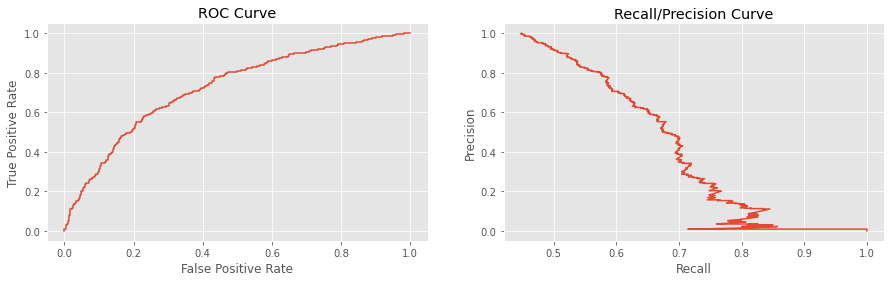

In [10]:
y_scale = dfScale['buy']
X_scale = dfScale.drop(['90_target','buy'], axis=1)
model = LogisticRegression()

plt.figure(figsize=(15, 4))
aio.modelcurve(X_scale, y_scale, model)